# Lab 2 - Math 742: Mathematical Statistics
## David Cortes
### February 9, 2026

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
# plotly command to install in notebook environment
%pip install plotly
import plotly.graph_objects as go

np.random.seed(742)
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries loaded successfully!")

Libraries loaded successfully!


---
## Part A: Common Parametric Families

### Gamma Distribution

I will simulate two samples from a $\text{Gamma}(\alpha, \beta)$ distribution with $\alpha = 3$ and $\beta = 2$, using sample sizes $n = 200$ and $n = 1000$.

**Parameterization note:** The lab uses $\beta$ as a **rate** parameter. Wasserman (Section 2.4, p. 29) and Casella & Berger (Section 3.3) both define the Gamma with $\beta$ as a **scale** parameter, so their formulas read $E(X) = \alpha\beta$ and $\text{Var}(X) = \alpha\beta^2$. With the rate parameterization used here ($\beta_{\text{rate}} = 1/\beta_{\text{scale}}$), we get:

- $E(X) = \dfrac{\alpha}{\beta} = \dfrac{3}{2} = 1.5$

- $\text{Var}(X) = \dfrac{\alpha}{\beta^2} = \dfrac{3}{4} = 0.75$

The mean and variance of the Gamma distribution are listed in Wasserman's Table in Section 3.4 (p. 53).

NumPy's `np.random.gamma` uses the scale parameterization, so we pass `scale = 1/β = 0.5`.

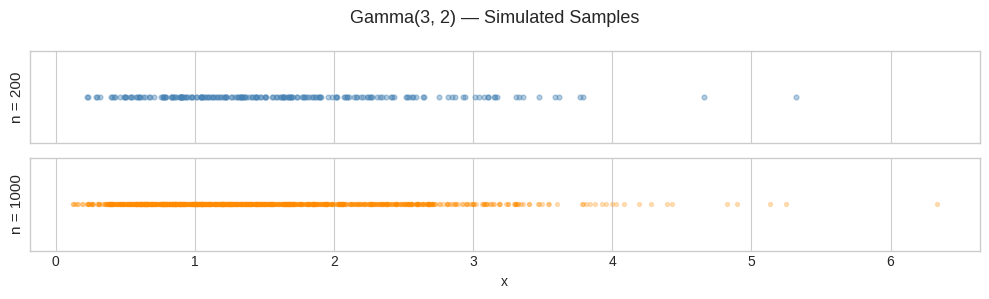

In [14]:
# 1. Simulate two samples from Gamma(alpha=3, beta=2)
alpha_true = 3
beta_true = 2

x_200  = np.random.gamma(shape=alpha_true, scale=1/beta_true, size=200)
x_1000 = np.random.gamma(shape=alpha_true, scale=1/beta_true, size=1000)

# Quick strip plots to visualize the raw samples
fig, axes = plt.subplots(2, 1, figsize=(10, 3), sharex=True)

axes[0].scatter(x_200, np.zeros_like(x_200), alpha=0.4, s=12, color='steelblue')
axes[0].set_yticks([])
axes[0].set_ylabel('n = 200', fontsize=11)

axes[1].scatter(x_1000, np.zeros_like(x_1000), alpha=0.25, s=8, color='darkorange')
axes[1].set_yticks([])
axes[1].set_ylabel('n = 1000', fontsize=11)
axes[1].set_xlabel('x')

fig.suptitle('Gamma(3, 2) — Simulated Samples', fontsize=13)
plt.tight_layout()
plt.show()

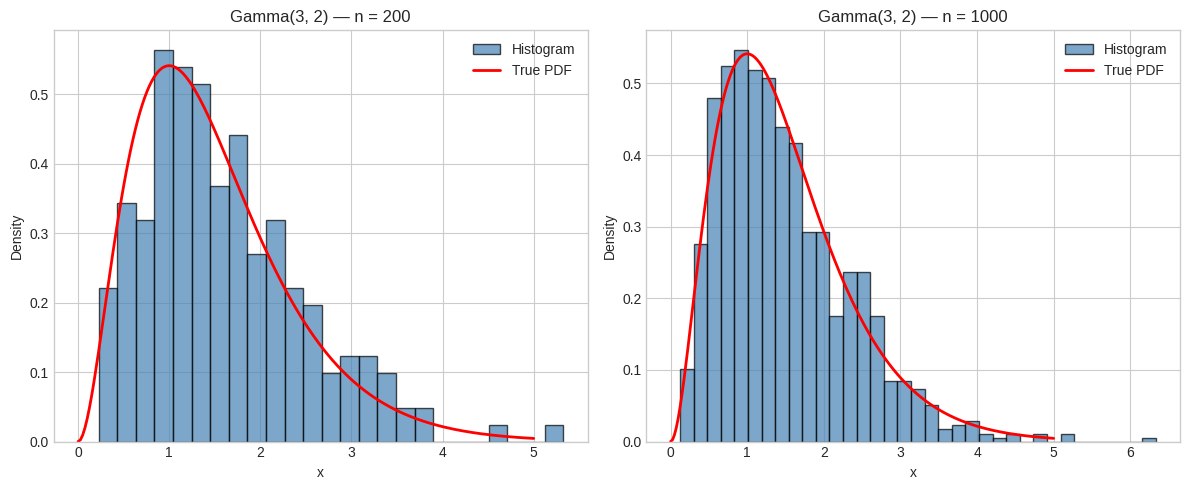

In [15]:
# 2. Histograms with the true PDF overlaid
x_grid = np.linspace(0, 5, 200)
true_pdf = gamma.pdf(x_grid, a=alpha_true, scale=1/beta_true)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# n = 200
axes[0].hist(x_200, bins=25, density=True, alpha=0.7,
             color='steelblue', edgecolor='black', label='Histogram')
axes[0].plot(x_grid, true_pdf, 'r-', lw=2, label='True PDF')
axes[0].set_title('Gamma(3, 2) — n = 200')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].legend()

# n = 1000
axes[1].hist(x_1000, bins=35, density=True, alpha=0.7,
             color='steelblue', edgecolor='black', label='Histogram')
axes[1].plot(x_grid, true_pdf, 'r-', lw=2, label='True PDF')
axes[1].set_title('Gamma(3, 2) — n = 1000')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

In [16]:
# 3. Compare sample mean and variance to theoretical values
import plotly.graph_objects as go
from plotly.subplots import make_subplots

theoretical_mean = alpha_true / beta_true        # 3/2 = 1.5
theoretical_var  = alpha_true / beta_true**2     # 3/4 = 0.75

mean_200,  var_200  = np.mean(x_200),  np.var(x_200, ddof=1)
mean_1000, var_1000 = np.mean(x_1000), np.var(x_1000, ddof=1)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Mean', 'Variance'),
                    horizontal_spacing=0.15)

# --- Mean panel ---
categories = ['n = 200', 'n = 1000', 'Theoretical']
mean_vals  = [mean_200, mean_1000, theoretical_mean]
colors     = ['#4C78A8', '#F58518', '#E45756']

for cat, val, col in zip(categories, mean_vals, colors):
    fig.add_trace(go.Bar(
        x=[cat], y=[val], marker_color=col, name=cat,
        text=[f'{val:.4f}'], textposition='outside',
        textfont=dict(size=13, color=col),
        width=0.55, showlegend=False
    ), row=1, col=1)

# Theoretical reference line
fig.add_hline(y=theoretical_mean, line_dash='dot', line_color='#E45756',
              line_width=2, row=1, col=1,
              annotation_text=f'E(X) = {theoretical_mean}',
              annotation_position='top left',
              annotation_font=dict(color='#E45756', size=11))

# --- Variance panel ---
var_vals = [var_200, var_1000, theoretical_var]

for cat, val, col in zip(categories, var_vals, colors):
    fig.add_trace(go.Bar(
        x=[cat], y=[val], marker_color=col, name=cat,
        text=[f'{val:.4f}'], textposition='outside',
        textfont=dict(size=13, color=col),
        width=0.55, showlegend=False
    ), row=1, col=2)

fig.add_hline(y=theoretical_var, line_dash='dot', line_color='#E45756',
              line_width=2, row=1, col=2,
              annotation_text=f'Var(X) = {theoretical_var}',
              annotation_position='top left',
              annotation_font=dict(color='#E45756', size=11))

fig.update_layout(
    title=dict(text='Gamma(3, 2) — Sample vs Theoretical Statistics',
               font=dict(size=18), x=0.5),
    template='plotly_white',
    height=450, width=750,
    margin=dict(t=90, b=50),
    yaxis=dict(title='Value', range=[0, max(mean_vals) * 1.25]),
    yaxis2=dict(title='Value', range=[0, max(var_vals) * 1.25]),
)

fig.show()

### 4. Comment on Differences as Sample Size Increases

Both samples produce means and variances close to the theoretical values ($E(X) = 1.5$, $\text{Var}(X) = 0.75$), but the $n = 1000$ sample is closer. This is expected — by the Law of Large Numbers, the sample mean converges to the true mean as $n$ grows.

In the histograms, the $n = 200$ plot is rougher and doesn't follow the true PDF as tightly, while the $n = 1000$ histogram matches the red curve much more closely. More data means the histogram fills in the shape of the distribution better and the sample statistics become more reliable.

---
## Part B: Sufficient Statistics

A statistic $T(\mathbf{X})$ is **sufficient** for a parameter $\theta$ if the conditional distribution of $\mathbf{X}$ given $T(\mathbf{X})$ does not depend on $\theta$. By the Factorization Theorem (Casella & Berger, Theorem 6.2.6), $T$ is sufficient if and only if the joint density can be written as $f(\mathbf{x}|\theta) = g(T(\mathbf{x}), \theta)\, h(\mathbf{x})$.

For the $\text{Gamma}(\alpha, \beta)$ family with rate parameterization, the joint likelihood of an iid sample $x_1, \dots, x_n$ is:

$$L(\alpha, \beta) = \prod_{i=1}^n \frac{\beta^\alpha}{\Gamma(\alpha)} x_i^{\alpha-1} e^{-\beta x_i} = \frac{\beta^{n\alpha}}{\Gamma(\alpha)^n} \left(\prod x_i\right)^{\alpha-1} e^{-\beta \sum x_i}$$

This depends on the data only through $T_1 = \sum x_i$ and $T_2 = \sum \log x_i$, so $(T_1, T_2)$ is jointly sufficient for $(\alpha, \beta)$ (Wasserman, Section 9.2; Casella & Berger, Section 6.2).

The log-likelihood is:

$$\ell(\alpha, \beta) = n\bigl(\alpha \log \beta - \log \Gamma(\alpha)\bigr) + (\alpha - 1)\, T_2 - \beta\, T_1$$

In [17]:
# 1. Simulate from Gamma(alpha=3, beta=2), n=500
np.random.seed(742)
alpha_true = 3
beta_true = 2
n = 500

x = np.random.gamma(shape=alpha_true, scale=1/beta_true, size=n)

# 2. Compute the sufficient statistics
T1 = np.sum(x)
T2 = np.sum(np.log(x))

print(f"n = {n}")
print(f"T1 = sum(xi)     = {T1:.4f}")
print(f"T2 = sum(log(xi)) = {T2:.4f}")

n = 500
T1 = sum(xi)     = 787.3044
T2 = sum(log(xi)) = 148.7344


In [18]:
# Visualize the sufficient statistics and the sample they summarize
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        f'T₁ = Σxᵢ  (data sum)',
        f'T₂ = Σlog(xᵢ)  (log-data sum)'
    ),
    horizontal_spacing=0.14
)

# --- Left panel: histogram of x_i with T1 annotation ---
fig.add_trace(go.Histogram(
    x=x, nbinsx=40, marker_color='#4C78A8', opacity=0.75,
    name='xᵢ values', showlegend=False
), row=1, col=1)

fig.add_vline(x=np.mean(x), line_dash='dot', line_color='#E45756', line_width=2,
              row=1, col=1,
              annotation_text=f'x̄ = {np.mean(x):.3f}',
              annotation_position='top right',
              annotation_font=dict(color='#E45756', size=12))

fig.add_annotation(
    x=0.22, y=0.95, xref='paper', yref='paper',
    text=f'<b>T₁ = {T1:.2f}</b><br>(n·x̄ = {n}·{np.mean(x):.3f})',
    showarrow=False, font=dict(size=13, color='#333'),
    bgcolor='rgba(255,255,255,0.85)', bordercolor='#4C78A8',
    borderwidth=2, borderpad=6
)

# --- Right panel: histogram of log(x_i) with T2 annotation ---
log_x = np.log(x)
fig.add_trace(go.Histogram(
    x=log_x, nbinsx=40, marker_color='#F58518', opacity=0.75,
    name='log(xᵢ) values', showlegend=False
), row=1, col=2)

fig.add_vline(x=np.mean(log_x), line_dash='dot', line_color='#E45756', line_width=2,
              row=1, col=2,
              annotation_text=f'mean = {np.mean(log_x):.3f}',
              annotation_position='top right',
              annotation_font=dict(color='#E45756', size=12))

fig.add_annotation(
    x=0.78, y=0.95, xref='paper', yref='paper',
    text=f'<b>T₂ = {T2:.2f}</b><br>(n·mean = {n}·{np.mean(log_x):.3f})',
    showarrow=False, font=dict(size=13, color='#333'),
    bgcolor='rgba(255,255,255,0.85)', bordercolor='#F58518',
    borderwidth=2, borderpad=6
)

fig.update_layout(
    title=dict(text='Sufficient Statistics — What T₁ and T₂ Capture from the Data',
               font=dict(size=16), x=0.5),
    template='plotly_white',
    height=400, width=850,
    xaxis_title='xᵢ', xaxis2_title='log(xᵢ)',
    yaxis_title='Count', yaxis2_title='Count',
    margin=dict(t=90, b=50)
)

fig.show()

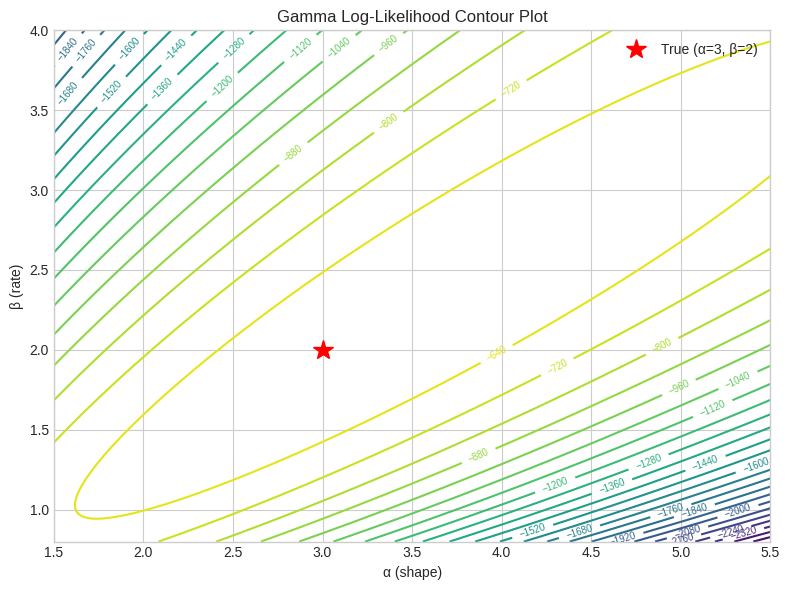

In [19]:
# 3. Log-likelihood surface as a contour plot
from scipy.special import gammaln

def log_likelihood(alpha, beta, n, T1, T2):
    return n * (alpha * np.log(beta) - gammaln(alpha)) + (alpha - 1) * T2 - beta * T1

# Grid of alpha and beta values around the true values
alpha_grid = np.linspace(1.5, 5.5, 200)
beta_grid  = np.linspace(0.8, 4.0, 200)
A, B = np.meshgrid(alpha_grid, beta_grid)

# Evaluate log-likelihood on the grid
LL = log_likelihood(A, B, n, T1, T2)

fig, ax = plt.subplots(figsize=(8, 6))
cp = ax.contour(A, B, LL, levels=30, cmap='viridis')
ax.clabel(cp, inline=True, fontsize=7)
ax.plot(alpha_true, beta_true, 'r*', markersize=15, label=f'True (α={alpha_true}, β={beta_true})')
ax.set_xlabel('α (shape)')
ax.set_ylabel('β (rate)')
ax.set_title('Gamma Log-Likelihood Contour Plot')
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
# I saw Dr. May during the lab meeting drawing the contour on the board, so, I started wondering if I could make an interactive 3D surface plot of the log-likelihood,
# so, I found this library: "plotly" searching on Google, the library allows interactive 3D plotting in Python.
# https://community.plotly.com/t/adding-a-shape-to-a-3d-plot/1441/8
# so, this is what I implemented

# Interactive 3D surface plot of the log-likelihood
fig = go.Figure(data=[
    go.Surface(x=alpha_grid, y=beta_grid, z=LL, colorscale='Viridis', opacity=0.9),
    go.Scatter3d(
        x=[alpha_true], y=[beta_true],
        z=[log_likelihood(alpha_true, beta_true, n, T1, T2)],
        mode='markers', marker=dict(size=6, color='red'),
        name=f'True (α={alpha_true}, β={beta_true})')
])

fig.update_layout(
    title='Gamma Log-Likelihood Surface (interactive)',
    scene=dict(xaxis_title='α (shape)', yaxis_title='β (rate)', zaxis_title='ℓ(α, β)'),
    width=700, height=550)
fig.show()

# the result is so cool, I am going to use this library from now on.

### 4. What Does the Likelihood Surface Look Like?

The contour plot shows a clear single mode near the true parameter values $(\alpha = 3, \beta = 2)$. The contours form elliptical shapes around the peak, which tells us the MLE is well-defined and unique.

There is a slight ridge-like elongation — the contours are stretched along a direction where $\alpha$ and $\beta$ increase together. This makes sense: if you increase $\alpha$ (shape) you can partially compensate by also increasing $\beta$ (rate) to keep the mean $\alpha/\beta$ roughly the same, so these parameters are positively correlated in the likelihood. Despite this, the mode is clearly identifiable and not degenerate.

---
## Part C: Method of Moments

The method of moments (Wasserman, Section 9.3; Casella & Berger, Section 7.2.1) estimates parameters by equating population moments to sample moments and solving.

### 1. Theoretical Moments

For $X \sim \text{Gamma}(\alpha, \beta)$ with rate $\beta$:

- $\mu_1 = E(X) = \dfrac{\alpha}{\beta} = \dfrac{3}{2} = 1.5$

- $\mu_2 = \text{Var}(X) = \dfrac{\alpha}{\beta^2} = \dfrac{3}{4} = 0.75$

### 2. Method of Moments Estimators

Setting $\bar{X} = \alpha/\beta$ and $S^2 = \alpha/\beta^2$ and solving:

From the second equation, $\beta = \alpha / (\beta \cdot S^2) = \bar{X}/S^2$. Substituting back:

$$\hat{\alpha}_{\text{MoM}} = \frac{\bar{X}^2}{S^2}, \qquad \hat{\beta}_{\text{MoM}} = \frac{\bar{X}}{S^2}$$

In [21]:
# Using the same sample x from Part B (n=500, alpha=3, beta=2)

# Theoretical moments
E_X   = alpha_true / beta_true       # 1.5
Var_X = alpha_true / beta_true**2    # 0.75

print("1. Theoretical Moments")
print(f"   E(X)   = α/β   = {alpha_true}/{beta_true} = {E_X}")
print(f"   Var(X) = α/β²  = {alpha_true}/{beta_true**2} = {Var_X}")

# Sample moments
x_bar = np.mean(x)
s2    = np.var(x, ddof=1)

# Method of moments estimators
alpha_mom = x_bar**2 / s2
beta_mom  = x_bar / s2

print("\n2. Method of Moments Estimates")
print(f"   x̄  = {x_bar:.4f}")
print(f"   s² = {s2:.4f}")
print(f"   α̂_MoM = x̄² / s² = {alpha_mom:.4f}   (true α = {alpha_true})")
print(f"   β̂_MoM = x̄  / s² = {beta_mom:.4f}    (true β = {beta_true})")

1. Theoretical Moments
   E(X)   = α/β   = 3/2 = 1.5
   Var(X) = α/β²  = 3/4 = 0.75

2. Method of Moments Estimates
   x̄  = 1.5746
   s² = 0.7300
   α̂_MoM = x̄² / s² = 3.3966   (true α = 3)
   β̂_MoM = x̄  / s² = 2.1571    (true β = 2)


In [22]:
# Visual: Theoretical moments vs Sample moments vs MoM-implied moments
import plotly.graph_objects as go

# MoM-implied theoretical moments: E(X) = alpha_mom/beta_mom, Var(X) = alpha_mom/beta_mom^2
mom_mean = alpha_mom / beta_mom
mom_var  = alpha_mom / beta_mom**2

labels = ['E(X)  —  Mean', 'Var(X)  —  Variance']
theo   = [E_X, Var_X]
samp   = [x_bar, s2]
mom_im = [mom_mean, mom_var]

fig = go.Figure()

# Theoretical
fig.add_trace(go.Bar(
    x=labels, y=theo, name='Theoretical',
    marker=dict(color='#E45756', line=dict(width=1.5, color='#B83B3A')),
    text=[f'{v:.4f}' for v in theo], textposition='outside',
    textfont=dict(size=13, color='#E45756'), width=0.22, offsetgroup=0
))

# Sample moments
fig.add_trace(go.Bar(
    x=labels, y=samp, name='Sample Moment',
    marker=dict(color='#4C78A8', line=dict(width=1.5, color='#36597E')),
    text=[f'{v:.4f}' for v in samp], textposition='outside',
    textfont=dict(size=13, color='#4C78A8'), width=0.22, offsetgroup=1
))

# MoM-implied (what the MoM estimates predict)
fig.add_trace(go.Bar(
    x=labels, y=mom_im, name='MoM-Implied',
    marker=dict(color='#72B7B2', line=dict(width=1.5, color='#4E9490')),
    text=[f'{v:.4f}' for v in mom_im], textposition='outside',
    textfont=dict(size=13, color='#4E9490'), width=0.22, offsetgroup=2
))

fig.update_layout(
    title=dict(
        text='Moment Comparison: Theoretical vs Sample vs MoM-Implied',
        font=dict(size=16), x=0.5),
    template='plotly_white',
    barmode='group', bargroupgap=0.3,
    height=450, width=700,
    yaxis=dict(title='Value', range=[0, max(max(theo), max(samp), max(mom_im)) * 1.3]),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5,
                font=dict(size=12)),
    margin=dict(t=100, b=50)
)

fig.show()

In [23]:
# 3. Compare MoM estimates to the true parameters
print("3. Comparison: MoM Estimates vs True Parameters")
print(f"\n{'Parameter':<12s} {'True':>10s} {'MoM':>10s} {'Error':>10s} {'% Error':>10s}")
print("-" * 54)
print(f"{'α':<12s} {alpha_true:>10.4f} {alpha_mom:>10.4f} {abs(alpha_mom - alpha_true):>10.4f} {100*abs(alpha_mom - alpha_true)/alpha_true:>9.2f}%")
print(f"{'β':<12s} {beta_true:>10.4f} {beta_mom:>10.4f} {abs(beta_mom - beta_true):>10.4f} {100*abs(beta_mom - beta_true)/beta_true:>9.2f}%")

3. Comparison: MoM Estimates vs True Parameters

Parameter          True        MoM      Error    % Error
------------------------------------------------------
α                3.0000     3.3966     0.3966     13.22%
β                2.0000     2.1571     0.1571      7.85%


In [24]:
# Visual comparison: MoM estimates vs true parameters
import plotly.graph_objects as go

params = ['α (shape)', 'β (rate)']
true_vals = [alpha_true, beta_true]
mom_vals  = [alpha_mom, beta_mom]
errors_pct = [100 * abs(m - t) / t for m, t in zip(mom_vals, true_vals)]

fig = go.Figure()

# True parameter values
fig.add_trace(go.Bar(
    x=params, y=true_vals,
    name='True Value',
    marker=dict(color='#E45756', line=dict(width=1.5, color='#B83B3A')),
    text=[f'{v:.2f}' for v in true_vals],
    textposition='outside', textfont=dict(size=14, color='#E45756'),
    width=0.3, offsetgroup=0
))

# MoM estimates
fig.add_trace(go.Bar(
    x=params, y=mom_vals,
    name='MoM Estimate',
    marker=dict(color='#4C78A8', line=dict(width=1.5, color='#36597E')),
    text=[f'{v:.4f}' for v in mom_vals],
    textposition='outside', textfont=dict(size=14, color='#4C78A8'),
    width=0.3, offsetgroup=1
))

# Add % error annotations between the bar pairs
for i, (param, pct) in enumerate(zip(params, errors_pct)):
    fig.add_annotation(
        x=param, y=max(true_vals[i], mom_vals[i]) + 0.55,
        text=f'<b>{pct:.1f}% error</b>',
        showarrow=False,
        font=dict(size=12, color='#555'),
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='#ccc', borderwidth=1, borderpad=4
    )

fig.update_layout(
    title=dict(text='Method of Moments: Estimated vs True Parameters',
               font=dict(size=17), x=0.5),
    template='plotly_white',
    barmode='group',
    bargroupgap=0.25,
    height=450, width=600,
    yaxis=dict(title='Parameter Value', range=[0, max(mom_vals) * 1.35]),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5,
                font=dict(size=13)),
    margin=dict(t=100, b=50)
)

fig.show()

### 3. How Close Are the MoM Estimates?

The MoM estimates $\hat\alpha \approx 3.40$ and $\hat\beta \approx 2.16$ are reasonably close to the true values $\alpha = 3$ and $\beta = 2$, with errors around 13% and 8% respectively. The slight overestimation in both parameters is consistent — since $\hat\beta = \hat\alpha / \bar X$, overestimating $\alpha$ pulls $\beta$ up as well.

With $n = 500$ samples, MoM gives a decent approximation, though it is not as efficient as the MLE. The method is simple and doesn't require numerical optimization, which is the main advantage.